In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
flight_traffic = pd.read_csv("flight_traffic.csv")
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
fares = pd.read_csv("fares.csv")
stock_prices = pd.read_csv("stock_prices.csv")
weather = pd.read_csv("weather.csv")
events_US = pd.read_csv("events_US.csv")
#Airports and Events needed some cleaning (They had ' in some of their data, needed removing)

In [61]:
flight_traffic.head(10)

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,17,AA,CLT,PHX,1619,1616.0,17.0,1633.0,...,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN
1,2017,1,18,AA,CLT,PHX,1619,1614.0,13.0,1627.0,...,0.0,0.0,277.0,247.0,1773.0,NaN,NaN,NaN,NaN,NaN
2,2017,1,19,AA,CLT,PHX,1619,1611.0,17.0,1628.0,...,0.0,0.0,277.0,255.0,1773.0,NaN,NaN,NaN,NaN,NaN
3,2017,1,20,AA,CLT,PHX,1619,1656.0,18.0,1714.0,...,0.0,0.0,277.0,273.0,1773.0,33.0,0.0,0.0,0.0,0.0
4,2017,1,21,AA,CLT,PHX,1619,1632.0,17.0,1649.0,...,0.0,0.0,277.0,266.0,1773.0,NaN,NaN,NaN,NaN,NaN
5,2017,1,22,AA,CLT,PHX,1619,1636.0,27.0,1703.0,...,0.0,0.0,277.0,285.0,1773.0,0.0,0.0,8.0,0.0,17.0
6,2017,1,23,AA,CLT,PHX,1619,1616.0,20.0,1636.0,...,0.0,0.0,277.0,291.0,1773.0,NaN,NaN,NaN,NaN,NaN
7,2017,1,24,AA,CLT,PHX,1619,1619.0,18.0,1637.0,...,0.0,0.0,277.0,285.0,1773.0,NaN,NaN,NaN,NaN,NaN
8,2017,1,25,AA,CLT,PHX,1619,1616.0,23.0,1639.0,...,0.0,0.0,277.0,290.0,1773.0,NaN,NaN,NaN,NaN,NaN
9,2017,1,26,AA,CLT,PHX,1619,1618.0,11.0,1629.0,...,0.0,0.0,277.0,284.0,1773.0,NaN,NaN,NaN,NaN,NaN


In [12]:
flight_traffic.tail()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
5674616,2017,12,17,UA,DEN,SJC,1913,1910.0,14.0,1924.0,...,0.0,0.0,161.0,136.0,948.0,NaN,NaN,NaN,NaN,NaN
5674617,2017,12,17,UA,DFW,DEN,1638,1632.0,19.0,1651.0,...,0.0,0.0,129.0,115.0,641.0,NaN,NaN,NaN,NaN,NaN
5674618,2017,12,17,UA,AUS,SFO,725,719.0,20.0,739.0,...,0.0,0.0,242.0,220.0,1504.0,NaN,NaN,NaN,NaN,NaN
5674619,2017,12,17,UA,MCO,EWR,1008,1007.0,11.0,1018.0,...,0.0,0.0,157.0,135.0,937.0,NaN,NaN,NaN,NaN,NaN
5674620,2017,12,17,UA,IAH,MEM,2000,2000.0,25.0,2025.0,...,0.0,0.0,95.0,88.0,468.0,NaN,NaN,NaN,NaN,NaN


In [13]:
flight_traffic.shape

(5674621, 24)

In [14]:
flight_traffic.describe()

,year,month,day,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,...,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
count,5674621.0,5.674621e+06,5.674621e+06,5.674621e+06,5.594313e+06,5.592476e+06,5.592480e+06,5.589947e+06,5.589947e+06,5.674621e+06,...,5.674621e+06,5.674621e+06,5.674614e+06,5.579410e+06,5.674621e+06,1.029473e+06,1.029473e+06,1.029473e+06,1.029473e+06,1.029473e+06
mean,2017.0,6.546344e+00,1.576329e+01,1.329969e+03,1.333704e+03,1.677994e+01,1.355794e+03,1.464579e+03,7.507610e+00,1.489308e+03,...,1.457243e-02,2.208077e-03,1.469928e+02,1.417624e+02,8.566888e+02,1.992933e+01,2.719604e+00,1.602838e+01,9.147399e-02,2.516343e+01
std,0.0,3.392347e+00,8.775588e+00,4.909376e+02,5.043987e+02,9.365385e+00,5.062227e+02,5.340316e+02,5.913152e+00,5.190175e+02,...,1.198335e-01,4.693828e-02,7.712135e+01,7.666672e+01,6.244887e+02,6.227602e+01,2.434302e+01,3.590292e+01,3.028055e+00,4.771769e+01
min,2017.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017.0,4.000000e+00,8.000000e+00,9.120000e+02,9.140000e+02,1.100000e+01,9.300000e+02,1.046000e+03,4.000000e+00,1.103000e+03,...,0.000000e+00,0.000000e+00,9.000000e+01,8.500000e+01,3.910000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017.0,7.000000e+00,1.600000e+01,1.323000e+03,1.327000e+03,1.400000e+01,1.340000e+03,1.506000e+03,6.000000e+00,1.520000e+03,...,0.000000e+00,0.000000e+00,1.280000e+02,1.230000e+02,6.800000e+02,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00
75%,2017.0,9.000000e+00,2.300000e+01,1.735000e+03,1.743000e+03,2.000000e+01,1.758000e+03,1.913000e+03,9.000000e+00,1.920000e+03,...,0.000000e+00,0.000000e+00,1.800000e+02,1.750000e+02,1.097000e+03,1.700000e+01,0.000000e+00,1.900000e+01,0.000000e+00,3.100000e+01
max,2017.0,1.200000e+01,3.100000e+01,2.359000e+03,2.400000e+03,1.830000e+02,2.400000e+03,2.400000e+03,4.140000e+02,2.359000e+03,...,1.000000e+00,1.000000e+00,7.180000e+02,7.840000e+02,4.983000e+03,1.934000e+03,1.934000e+03,1.605000e+03,8.270000e+02,1.756000e+03


In [15]:
flight_traffic.isnull().sum()

year                         0
month                        0
day                          0
airline_id                   0
origin_airport               0
destination_airport          0
scheduled_departure          0
actual_departure         80308
taxi_out                 82145
wheels_off               82141
wheels_on                84674
taxi_in                  84674
scheduled_arrival            0
actual_arrival           84674
cancelled                    0
diverted                     0
scheduled_elapsed            7
actual_elapsed           95211
distance                     0
airline_delay          4645148
weather_delay          4645148
air_system_delay       4645148
security_delay         4645148
aircraft_delay         4645148
dtype: int64

In [20]:
stock_prices.head()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85


In [22]:
stock_prices.tail()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA
375,10/7/16,37.73,52.82,17.39,28.50,68.11,42.24,38.47,38.95,49.50
376,10/6/16,38.17,53.98,17.62,28.52,69.09,42.99,39.17,39.94,50.82
377,10/5/16,37.87,53.82,17.86,28.06,68.31,43.16,39.10,40.32,50.83
378,10/4/16,37.63,53.73,17.83,27.89,68.71,43.64,39.16,40.15,50.63
379,10/3/16,37.70,53.25,17.66,27.70,67.09,43.74,39.74,39.98,49.99


In [23]:
stock_prices.describe()

,AA,UA,B6,OO,AS,NK,WN,DL,HA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,47.863211,68.253974,20.788039,41.095000,79.822684,46.577652,55.283460,50.130434,45.161553
std,4.335259,6.954955,1.499153,8.663919,11.084383,8.080543,6.138288,4.104723,6.790032
min,37.380000,52.820000,16.930000,27.700000,57.750000,32.090000,38.400000,38.940000,32.850000
25%,45.242500,63.350000,19.780000,35.368750,69.735000,39.217500,52.662500,47.810000,38.987500
50%,47.695000,68.480000,20.845000,36.850000,80.495000,47.280000,55.960000,50.130000,45.975000
75%,51.030000,73.607500,22.050000,49.337500,89.185000,53.555000,59.172500,52.920000,50.362500
max,58.470000,82.030000,23.750000,60.300000,100.240000,59.740000,66.290000,60.130000,60.300000


In [24]:
stock_prices.isnull().sum()

timestamp    0
AA           0
UA           0
B6           0
OO           0
AS           0
NK           0
WN           0
DL           0
HA           0
dtype: int64

In [45]:
stock_prices_X = stock_prices['timestamp']
stock_prices_Y = stock_prices.drop('timestamp', axis=1)
print([stock for stock in stock_prices_Y])

['AA', 'UA', 'B6', 'OO', 'AS', 'NK', 'WN', 'DL', 'HA']


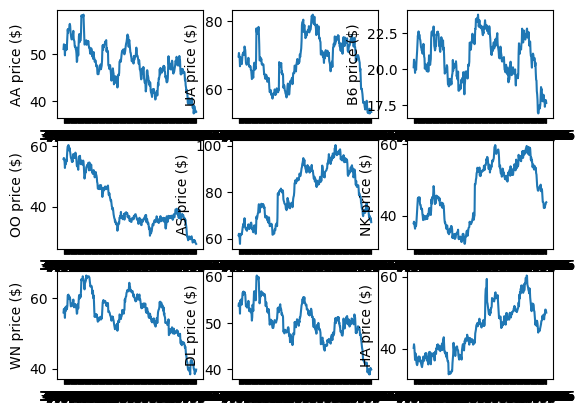

In [50]:
for i, stock in enumerate(stock_prices_Y):
    plt.subplot(3, 3, i+1)
    plt.plot(stock_prices_X, stock_prices_Y[stock])
    plt.ylabel(f"{stock} price ($)")
plt.show()

In [35]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


In [36]:
fares.tail()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
80818,4,AA,STL,MSY,604,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80819,4,WN,SDF,ROC,544,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80820,4,WN,BDL,ONT,2482,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80821,4,WN,HRL,TUL,695,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80822,4,UA,EVV,HPN,766,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
fares.describe()

,quarter,distance,10,20,30,40,50,60,70,80,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
count,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,...,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000,80823.000000
mean,2.508741,873.041572,24.202529,30.816166,34.840243,35.838944,35.405887,34.216003,32.860844,31.528562,...,0.019363,0.024436,0.019103,0.019326,0.022716,0.023211,0.021207,0.018015,0.019388,1.624154
std,1.103061,698.320100,142.302295,143.348720,134.418611,123.848542,112.175699,102.060900,93.294482,87.099481,...,0.322360,0.605837,0.377973,0.368010,0.453776,0.599696,0.694329,0.404434,0.389581,9.531341
min,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,329.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,682.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1189.000000,8.000000,6.000000,7.000000,9.000000,12.000000,15.000000,18.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5674.000000,8452.000000,4845.000000,3268.000000,2937.000000,2513.000000,2002.000000,1722.000000,2109.000000,...,27.000000,82.000000,48.000000,45.000000,62.000000,85.000000,156.000000,65.000000,52.000000,330.000000


In [38]:
weather.head()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
0,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T00:54:00,3.9,16093,220,7.2,NaN,NaN
1,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T06:54:00,0.6,16093,260,6.2,NaN,NaN
2,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T12:54:00,-0.6,16093,250,5.1,NaN,9.0
3,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-01T18:54:00,2.2,16093,240,5.7,NaN,9.0
4,BUF,"BUFFALO NIAGARA INTERNATIONAL, NY US",42.9408,-78.7358,218.2,2017-01-02T00:54:00,-0.6,16093,170,1.5,NaN,NaN


In [39]:
weather.tail()

,airport_id,airport_name,latitude,longitude,elevation,datetime,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
353859,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2017-06-01T18:53:00,23.9,16093,30,3.6,NaN,NaN
353860,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T00:53:00,-22.2,16093,999,0.0,NaN,NaN
353861,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T06:53:00,-20.0,16093,999,0.0,NaN,NaN
353862,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T12:53:00,-20.6,16093,999,0.0,NaN,NaN
353863,HLN,"HELENA AIRPORT ASOS, MT US",46.6056,-111.9636,1166.8,2018-01-01T18:53:00,-21.1,11265,999,0.0,NaN,NaN


In [41]:
weather.describe()

,latitude,longitude,elevation,temperature,visibility,wind_direction,wind_speed,snow_depth,cloud_status
count,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,353864.000000,161.000000,219924.0
mean,39.274844,-97.731652,381.337180,15.689767,16853.622745,326.495860,7.193903,13.142857,9.0
std,8.424115,21.302403,541.440381,47.625813,43579.156542,315.626276,59.468636,14.473189,0.0
min,17.699700,-176.650000,1.200000,-45.000000,0.000000,4.000000,0.000000,0.000000,9.0
25%,33.565560,-108.540000,29.000000,5.600000,16093.000000,130.000000,2.100000,5.000000,9.0
50%,39.483800,-92.838890,187.500000,15.000000,16093.000000,220.000000,3.100000,8.000000,9.0
75%,43.116700,-82.537500,389.200000,22.800000,16093.000000,330.000000,5.100000,15.000000,9.0
max,71.283400,-64.812500,2353.100000,999.900000,999999.000000,999.000000,999.900000,79.000000,9.0


In [42]:
weather['cloud_status'].value_counts()
#Cloud Status is irrelevant, all airports either have no info or the same info

cloud_status
9.0    219924
Name: count, dtype: int64

In [51]:
weather['snow_depth'].fillna(0, inplace=True)

In [53]:
weather['snow_depth'].isnull().sum()

0

In [55]:
flight_traffic['airline_delay'].value_counts()

airline_delay
0.0       514242
1.0        20899
2.0        20422
3.0        20071
4.0        19516
           ...  
736.0          1
979.0          1
1322.0         1
1067.0         1
1219.0         1
Name: count, Length: 1329, dtype: int64

In [56]:
flight_traffic['air_system_delay'].value_counts()

air_system_delay
0.0       472540
1.0        23727
15.0       22345
2.0        20262
16.0       19878
           ...  
968.0          1
1246.0         1
810.0          1
1173.0         1
1014.0         1
Name: count, Length: 821, dtype: int64

In [60]:
flight_traffic.columns

Index(['year', 'month', 'day', 'airline_id', 'origin_airport',
       'destination_airport', 'scheduled_departure', 'actual_departure',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'scheduled_arrival',
       'actual_arrival', 'cancelled', 'diverted', 'scheduled_elapsed',
       'actual_elapsed', 'distance', 'airline_delay', 'weather_delay',
       'air_system_delay', 'security_delay', 'aircraft_delay'],
      dtype='object')

In [57]:
delays = flight_traffic[['air_system_delay', 'airline_delay', 'weather_delay', 'security_delay', 'aircraft_delay']]

In [58]:
delays.head()

,air_system_delay,airline_delay,weather_delay,security_delay,aircraft_delay
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,0.0,33.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN


In [62]:
delays.fillna(0, inplace=True)

In [63]:
delays.head()

,air_system_delay,airline_delay,weather_delay,security_delay,aircraft_delay
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,33.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [64]:
delays.describe()

,air_system_delay,airline_delay,weather_delay,security_delay,aircraft_delay
count,5.674621e+06,5.674621e+06,5.674621e+06,5.674621e+06,5.674621e+06
mean,2.907822e+00,3.615519e+00,4.933826e-01,1.659494e-02,4.565075e+00
std,1.649249e+01,2.761472e+01,1.042127e+01,1.290223e+00,2.251922e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.605000e+03,1.934000e+03,1.934000e+03,8.270000e+02,1.756000e+03


In [68]:
stock_prices.info

<bound method DataFrame.info of     timestamp     AA       UA     B6     OO     AS       NK      WN     DL  \
0      4/6/18  51.12  69.6501  20.12  55.70  61.44  37.8576  55.865  53.67   
1      4/5/18  52.14  70.6900  20.64  56.05  62.11  38.3000  56.860  54.21   
2      4/4/18  52.04  69.9900  20.48  55.45  61.22  37.7000  56.360  53.86   
3      4/3/18  51.47  69.1900  20.15  54.80  60.11  37.2200  55.970  53.72   
4      4/2/18  49.78  66.7700  19.73  52.75  57.75  36.3500  54.340  51.95   
..        ...    ...      ...    ...    ...    ...      ...     ...    ...   
375   10/7/16  37.73  52.8200  17.39  28.50  68.11  42.2400  38.470  38.95   
376   10/6/16  38.17  53.9800  17.62  28.52  69.09  42.9900  39.170  39.94   
377   10/5/16  37.87  53.8200  17.86  28.06  68.31  43.1600  39.100  40.32   
378   10/4/16  37.63  53.7300  17.83  27.89  68.71  43.6400  39.160  40.15   
379   10/3/16  37.70  53.2500  17.66  27.70  67.09  43.7400  39.740  39.98   

        HA  
0    40.20  
1    

In [69]:
for stock in stock_prices_Y:
    stock_prices[f'{stock}_price_diff'] = stock_prices[stock] - stock_prices[stock].shift(-1)

In [72]:
stock_prices.head(10)

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff
0,4/6/18,51.12,69.6501,20.12,55.70,61.44,37.8576,55.865,53.67,40.20,-1.02,-1.0399,-0.52,-0.35,-0.67,-0.4424,-0.995,-0.54,-1.00
1,4/5/18,52.14,70.6900,20.64,56.05,62.11,38.3000,56.860,54.21,41.20,0.10,0.7000,0.16,0.60,0.89,0.6000,0.500,0.35,0.70
2,4/4/18,52.04,69.9900,20.48,55.45,61.22,37.7000,56.360,53.86,40.50,0.57,0.8000,0.33,0.65,1.11,0.4800,0.390,0.14,1.75
3,4/3/18,51.47,69.1900,20.15,54.80,60.11,37.2200,55.970,53.72,38.75,1.69,2.4200,0.42,2.05,2.36,0.8700,1.630,1.77,1.90
4,4/2/18,49.78,66.7700,19.73,52.75,57.75,36.3500,54.340,51.95,36.85,-2.18,-2.7000,-0.59,-1.65,-4.21,-1.4300,-2.940,-2.86,-1.85
5,3/29/18,51.96,69.4700,20.32,54.40,61.96,37.7800,57.280,54.81,38.70,1.11,1.5600,0.15,0.45,0.39,0.7900,1.030,0.88,0.35
6,3/28/18,50.85,67.9100,20.17,53.95,61.57,36.9900,56.250,53.93,38.35,-0.05,-0.2700,0.22,-0.35,0.08,-0.2000,-0.440,-0.33,1.20
7,3/27/18,50.90,68.1800,19.95,54.30,61.49,37.1900,56.690,54.26,37.15,-0.96,-0.3000,-0.53,-1.30,-0.67,-1.0800,-0.900,-0.80,0.95
8,3/26/18,51.86,68.4800,20.48,55.60,62.16,38.2700,57.590,55.06,36.20,0.85,1.0900,-0.36,0.65,0.28,-1.6900,0.870,1.16,0.60
9,3/23/18,51.01,67.3900,20.84,54.95,61.88,39.9600,56.720,53.90,35.60,-1.30,-1.0600,-0.43,-1.90,-0.94,-1.3100,-0.280,-0.77,0.20


In [71]:
stock_prices.tail()

,timestamp,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff
375,10/7/16,37.73,52.82,17.39,28.50,68.11,42.24,38.47,38.95,49.50,-0.44,-1.16,-0.23,-0.02,-0.98,-0.75,-0.70,-0.99,-1.32
376,10/6/16,38.17,53.98,17.62,28.52,69.09,42.99,39.17,39.94,50.82,0.30,0.16,-0.24,0.46,0.78,-0.17,0.07,-0.38,-0.01
377,10/5/16,37.87,53.82,17.86,28.06,68.31,43.16,39.10,40.32,50.83,0.24,0.09,0.03,0.17,-0.40,-0.48,-0.06,0.17,0.20
378,10/4/16,37.63,53.73,17.83,27.89,68.71,43.64,39.16,40.15,50.63,-0.07,0.48,0.17,0.19,1.62,-0.10,-0.58,0.17,0.64
379,10/3/16,37.70,53.25,17.66,27.70,67.09,43.74,39.74,39.98,49.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
stock_prices.describe()

,AA,UA,B6,OO,AS,NK,WN,DL,HA,AA_price_diff,UA_price_diff,B6_price_diff,OO_price_diff,AS_price_diff,NK_price_diff,WN_price_diff,DL_price_diff,HA_price_diff
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,47.863211,68.253974,20.788039,41.095000,79.822684,46.577652,55.283460,50.130434,45.161553,0.035409,0.043272,0.006491,0.073879,-0.014908,-0.015521,0.042546,0.036121,-0.025831
std,4.335259,6.954955,1.499153,8.663919,11.084383,8.080543,6.138288,4.104723,6.790032,0.893245,1.355951,0.362538,0.876716,1.424541,1.018542,0.878120,0.793335,1.080267
min,37.380000,52.820000,16.930000,27.700000,57.750000,32.090000,38.400000,38.940000,32.850000,-3.500000,-8.920000,-1.450000,-2.750000,-10.410000,-8.780000,-3.550000,-3.130000,-5.750000
25%,45.242500,63.350000,19.780000,35.368750,69.735000,39.217500,52.662500,47.810000,38.987500,-0.445000,-0.590000,-0.210000,-0.425000,-0.785000,-0.505000,-0.375000,-0.375000,-0.575000
50%,47.695000,68.480000,20.845000,36.850000,80.495000,47.280000,55.960000,50.130000,45.975000,0.030000,0.030000,0.020000,0.100000,0.000000,-0.030000,0.060000,0.050000,0.000000
75%,51.030000,73.607500,22.050000,49.337500,89.185000,53.555000,59.172500,52.920000,50.362500,0.570000,0.715000,0.225000,0.600000,0.775000,0.515000,0.525000,0.440000,0.600000
max,58.470000,82.030000,23.750000,60.300000,100.240000,59.740000,66.290000,60.130000,60.300000,2.780000,4.600000,1.310000,2.850000,4.530000,2.660000,4.460000,3.180000,6.500000
